# Actividad 2.2
En esta actividad se seleccionó un set de datos de pepsi vs coca cola. En esta actividad se hara el procesado de los datos.

Link del data set utilizado: https://www.kaggle.com/datasets/die9origephit/pepsi-and-cocacola-images. Los datos ya vienen separados entre train y test

Este código está generado con base en el material visto en clase.

Ingresar a la carpeta de drive en la que se estará trabajando

In [68]:
# Autorizar al archivo a conectarse con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
# Accede a la carpeta de drive con la que estamos trabajando y lista su contenido
%cd "/content/drive/MyDrive/Cursos/Tarea 2.2"
!ls

/content/drive/MyDrive/Cursos/Tarea 2.2
Actividad2.2.ipynb  augmented  images


# Preparación de los datos
Se generan copias de las imagenes en diferentes perspectivas para poder entrenar al modelo.

In [70]:
# Importamos las librerias
import matplotlib.pyplot as plt
import numpy as np
import os # Nos ayuda a leer los archivos de drive.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [71]:
# Accedemos a la carpeta donde están las carpetas de test y training
path = "/content/drive/MyDrive/Cursos/Tarea 2.2"

# Accedemos a la carpeta donde están las imagenes
base_dir = 'images'

# Accedemos a las carpetas de train y test
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

# Se hace data augmentation para generar nuevas imagenes
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.4,
							height_shift_range = 0.4,
							shear_range = 0.4,
							zoom_range = 0.4,
							horizontal_flip = True,)

Tomamos imagenes de la carpeta train para entrenar a nuestro modelo.

Found 340 images belonging to 2 classes.


<Figure size 640x480 with 0 Axes>

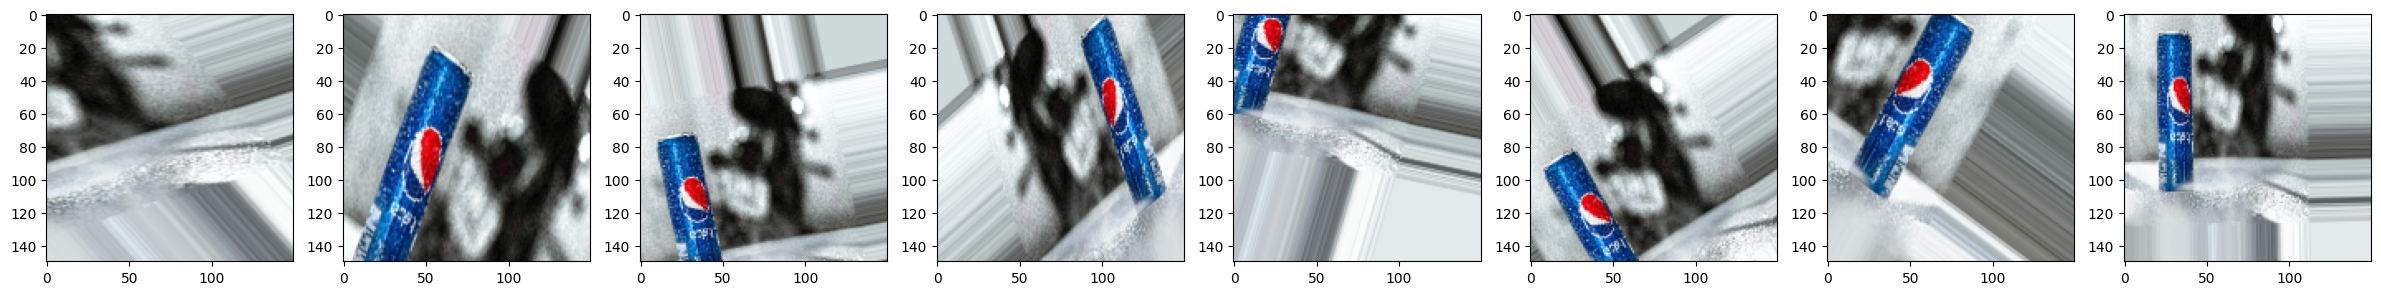

In [72]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary', # Usamos binary por que solo tenemmos dos clases
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 8, figsize=(30, 8)) 

for i in range(8) :
  axarr[i].imshow(train_generator[0][0][0])

Se generan las imagenes modificadas en una carpeta llamada *augmented*

In [73]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= path + '/augmented',   
              save_prefix='aug',
              save_format='png'
							)

Found 340 images belonging to 2 classes.



Modificamos las imagenes para que se puedan interpretar de varias formas

Found 340 images belonging to 2 classes.
(8, 150, 150, 3)
[0. 1. 0. 0. 1. 1. 1. 1.]


<Figure size 640x480 with 0 Axes>

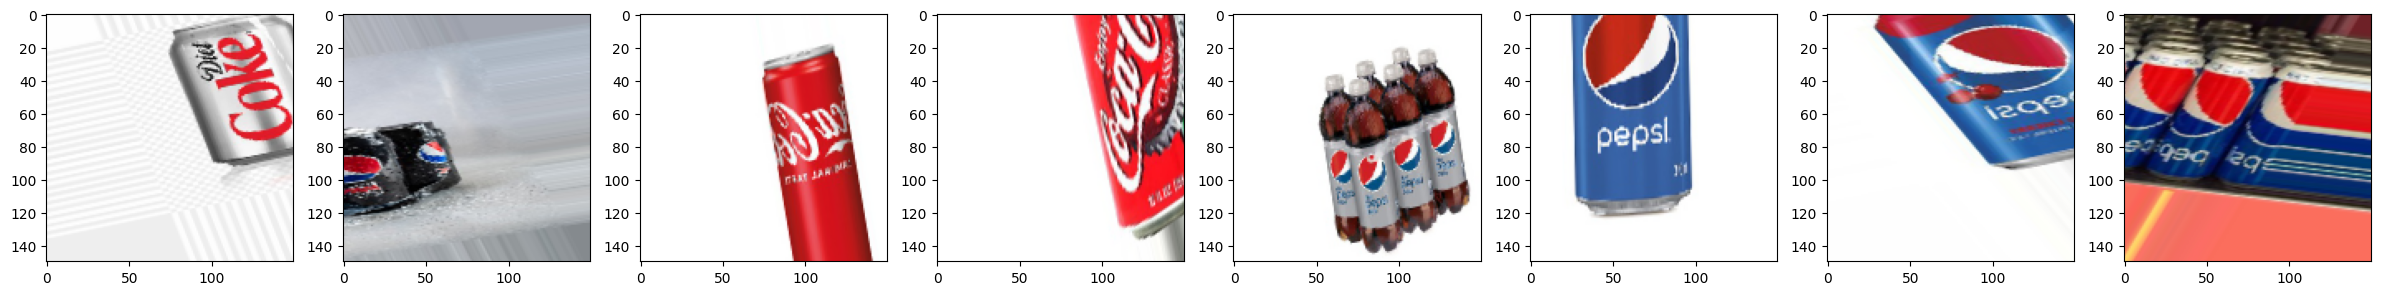

In [74]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

Se dice que hay que guardar las imagenes en augmented

In [75]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= path + '/augmented',   
              save_prefix='aug',
              save_format='png'
							)

Found 340 images belonging to 2 classes.


Inicia la red neuronal

In [76]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers

# Actualmente el modelo tiene 6 capas						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_6 (Flatten)         (None, 219040)            0         
                                                                 
 flatten_7 (Flatten)         (None, 219040)            0         
                                                                 
 dense_9 (Dense)             (None, 256)               56074496  
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 56,140,825
Trainable params: 56,140,825


Se genera el historial del entrenammiento con 40 epocas

Epoch 1/40
43/43 [==============================] - 44s 1s/step - loss: 0.7739 - acc: 0.5824
Epoch 2/40
43/43 [==============================] - 43s 996ms/step - loss: 0.6561 - acc: 0.6235
Epoch 3/40
43/43 [==============================] - 43s 997ms/step - loss: 0.6506 - acc: 0.6471
Epoch 4/40
43/43 [==============================] - 43s 993ms/step - loss: 0.5549 - acc: 0.7147
Epoch 5/40
43/43 [==============================] - 44s 1s/step - loss: 0.5961 - acc: 0.6853
Epoch 6/40
43/43 [==============================] - 43s 1s/step - loss: 0.5887 - acc: 0.6941
Epoch 7/40
43/43 [==============================] - 43s 1s/step - loss: 0.5430 - acc: 0.7147
Epoch 8/40
43/43 [==============================] - 43s 1000ms/step - loss: 0.5553 - acc: 0.7147
Epoch 9/40
43/43 [==============================] - 43s 1000ms/step - loss: 0.4949 - acc: 0.7353
Epoch 10/40
43/43 [==============================] - 43s 1s/step - loss: 0.5324 - acc: 0.7265
Epoch 11/40
43/43 [==============================] -

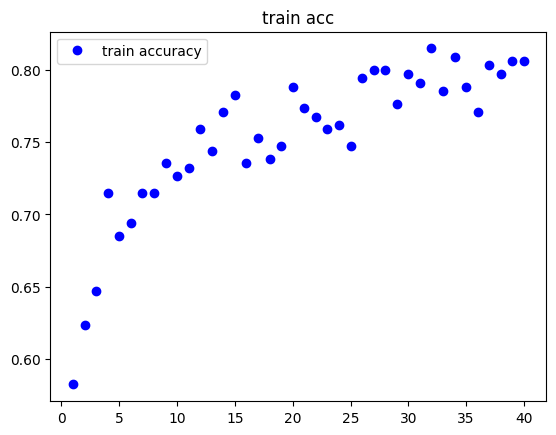

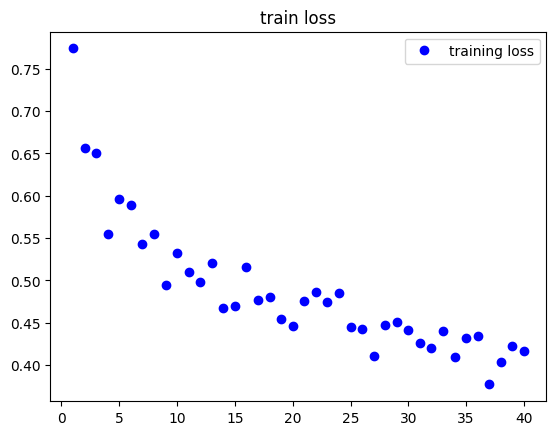

In [77]:

history = model.fit(
						train_generator, 
						epochs = 40)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Se evalúa el modelo. Se obtiene la precisión del modelo.

In [78]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 60 images belonging to 2 classes.
 3/25 [==>...........................] - ETA: 2s - loss: 6.4319 - acc: 0.9167

25/25 [==============================] - 1s 13ms/step - loss: 6.4319 - acc: 0.9167

test acc :
 0.9166666865348816
